In [ ]:
### langchain, we test agent loaded with tool, not working. 
## may test use tool node and agent 

In [12]:
import os
API_KEY = '<OPENAI_API_KEY>'
Deepseek_key='<OPENAI_API_KEY>'
Tav_API_KEY='<TAVILY_API_KEY>'
os.environ['OPENAI_API_KEY']=API_KEY
os.environ["TAVILY_API_KEY"]=Tav_API_KEY
from langchain import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.agents import initialize_agent, Tool
from langchain import LLMMathChain, OpenAI, SerpAPIWrapper
from langchain.agents import AgentType
from langchain.tools import BaseTool
import json
import pandas as pd
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
from langchain_core.tools import tool

@tool
def search_weather(location: str) -> str:
  """Fetches weather information for a given location."""
  # Implementation to fetch weather data (e.g., using an API)
  return weather_info

In [6]:
### test API case use my function, not depdent on lainchain library
import yfinance as yf
import pandas
import tvscreener as tvs
from tvscreener import StockField, TimeInterval
from tvscreener.filter import FilterOperator
#query='BN'
@tool
def get_stock_info(query):
    """
    Performs gene set enrichment analysis using gseapy's enrichr function.
    Returns the results as a DataFrame or a detailed error message.

    Args:
        target_gl (list): List of gene symbols for enrichment analysis.

    Returns:
        # pd.DataFrame: DataFrame containing enrichment results or a single-row table with error details.
         dict: JSON containing enrichment results or error details.
    """

    try:
        screener = tvs.StockScreener()
        screener.search(query)
# Query a specific stock ticker
        ticker_info = screener.get()  # Example for Apple Inc.
# Display the results
        print(ticker_info)
        ticker_info.head(10)
        
    except Exception as e:
        # Log error details
        print("Error during query:", str(e))
        

        # Return error as a DataFrame
        error_df = pd.DataFrame({
            "Error": [str(e)],
            "Details": [
                f"Processed  list: {target_gl}. "
                
            ]
        })
        return error_df
# Create a StructuredTool for the function
stock_tool = Tool.from_function(
    name="get_stock_info",
    func=get_stock_info,
    description=(
        "This tool performs stock information using tvs. "
        #"Input: A list of gene symbols. Output: A DataFrame with results or error details."
    ),
    return_direct=True
)

In [10]:
llm_math_chain = LLMMathChain.from_llm(llm=llm, verbose=True)

In [13]:
tools = [
    Tool(
        name = "get_stock_info",
        func=stock_tool.run,
        description="useful for when you need to stock real-time data"),
        
    Tool(
        name="Calculator",
        func=llm_math_chain.run,
        description="useful for when you need to calculate the number of new cases each year based on the incidence rate in a population of 5000 individuals"
    )
]
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

C:\Users\difen\AppData\Local\Temp\ipykernel_7908\1401399461.py:13: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. See LangGraph documentation for more details: https://langchain-ai.github.io/langgraph/. Refer here for its pre-built ReAct agent: https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/
  agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)


In [29]:
agent.run('search the most active stock ticker and use stock_tool funrion to query ticker APPL')



> Entering new AgentExecutor chain...
It seems there is a typo in the stock ticker symbol you provided. The correct ticker symbol for Apple Inc. is "AAPL," not "APPL." I will proceed with querying the stock information for "AAPL" using the `get_stock_info` tool.

Action: get_stock_info
Action Input: "AAPL"        Symbol  Name                                        Description  \
0  NASDAQ:AAPL  AAPL                                         Apple Inc.   
1  NASDAQ:AAPB  AAPB               GraniteShares 2x Long AAPL Daily ETF   
2  NASDAQ:AAPD  AAPD                 Direxion Daily AAPL Bear 1X Shares   
3  NASDAQ:AAPU  AAPU                 Direxion Daily AAPL Bull 2X Shares   
4    AMEX:APLY  APLY  Tidal ETF Trust II YieldMax AAPL Option Income...   
5    CBOE:AAPY  AAPY       Kurv Yield Premium Strategy Apple (AAPL) ETF   

   All Time High  All Time Low  All Time Performance  Aroon Down (14)  \
0        260.100      0.049107         189509.499174        92.857143   
1         36.475   

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `It seems there is a persistent issue with retrieving the stock information for "AAPL" using the `get_stock_info` tool. This could be due to a technical problem or a limitation in accessing real-time data at the moment. Unfortunately, I am unable to provide the stock information for Apple Inc. at this time. 

If you have any other questions or need assistance with a different topic, feel free to ask!`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [32]:
agent.run('APPL')



> Entering new AgentExecutor chain...
It seems like you are asking about "APPL," which might be a typo for "AAPL," the stock ticker for Apple Inc. If you are looking for information about Apple's stock, I can retrieve real-time stock data for you.

Action: get_stock_info
Action Input: "AAPL"        Symbol  Name                                        Description  \
0  NASDAQ:AAPL  AAPL                                         Apple Inc.   
1  NASDAQ:AAPU  AAPU                 Direxion Daily AAPL Bull 2X Shares   
2  NASDAQ:AAPB  AAPB               GraniteShares 2x Long AAPL Daily ETF   
3  NASDAQ:AAPD  AAPD                 Direxion Daily AAPL Bear 1X Shares   
4    CBOE:AAPY  AAPY       Kurv Yield Premium Strategy Apple (AAPL) ETF   
5    AMEX:APLY  APLY  Tidal ETF Trust II YieldMax AAPL Option Income...   

   All Time High  All Time Low  All Time Performance  Aroon Down (14)  \
0        260.100      0.049107         189509.499174        92.857143   
1         43.099     15.550000    

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `It seems there was an issue retrieving the real-time stock data for Apple Inc. (AAPL). However, I can provide general information about Apple Inc. and its stock. Apple Inc. is a leading technology company known for its products like the iPhone, iPad, Mac computers, and services like the App Store and Apple Music. The stock ticker for Apple Inc. is AAPL, and it is traded on the NASDAQ stock exchange. For the most accurate and up-to-date stock information, you may want to check a financial news website or a stock market app. 

If you have any other questions or need further assistance, feel free to ask!`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [46]:
#from langgraph import StateGraph
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

#graph_builder = StateGraph(State)
graph = StateGraph(State)
graph.add_edge(START, "agent")
graph.add_node("agent", agent)  # Add the agent node
graph.add_edge("agent", END)
G = graph.compile()


In [45]:
def stream_graph_updates(user_input: str):
    try:
        # Add 'input' key to the payload as required
        input_state = {
            "input": user_input,  # This satisfies the 'input' key requirement
            "messages": [{"role": "user", "content": user_input}]  # Additional context for messages
        }
        for event in G.stream(input_state):
            for value in event.values():
                print("Assistant:", value["messages"][-1]["content"])
    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Main loop for user interaction
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User:  MMM




> Entering new AgentExecutor chain...
Error: Missing some input keys: {'input'}


User:  MMM




> Entering new AgentExecutor chain...
Error: Missing some input keys: {'input'}


User:  q


Goodbye!


In [47]:
print("Input state:", input_state)

NameError: name 'input_state' is not defined

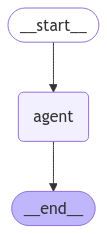

In [24]:
from IPython.display import Image, display

try:
    display(Image(G.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [41]:
def stream_graph_updates(user_input: str):
    try:
        # Correct the input structure with the required 'messages' key
        input_data = {
            "messages": [{"role": "user", "content": user_input}]
        }
        for event in G.stream(input_data):
            for value in event.values():
                print("Assistant:", value["messages"][-1]["content"])
    except ValueError as e:
        print(f"Error: {e}")

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User:  MMM




> Entering new AgentExecutor chain...
Error: Missing some input keys: {'input'}


User:  APPL




> Entering new AgentExecutor chain...
Error: Missing some input keys: {'input'}


User:  quit


Goodbye!


In [40]:
def stream_graph_updates(user_input: str):
    try:
        # The 'input' key is required; include it in the payload
        input_data = {
            "input": user_input  # Adjust this based on the exact requirement
        }
        for event in G.stream(input_data):  # Pass the corrected input data
            for value in event.values():
                print("Assistant:", value["messages"][-1]["content"])
    except ValueError as e:
        print(f"Error: {e}")

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        print(f"An error occurred: {e}")
        break


User:  MMM


An error occurred: Must write to at least one of ['messages']


In [39]:
def stream_graph_updates(user_input: str):
    try:
        # Structure the input according to expectations
        input_data = {
            "messages": [{"role": "user", "content": user_input}]
        }
        for event in G.stream(input_data):
            for value in event.values():
                print("Assistant:", value["messages"][-1]["content"])
    except ValueError as e:
        print(f"Error: {e}")

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        # Handle errors gracefully
        print(f"An error occurred: {e}")
        break


User:  MMM




> Entering new AgentExecutor chain...
Error: Missing some input keys: {'input'}


User:  MMM




> Entering new AgentExecutor chain...
Error: Missing some input keys: {'input'}


User:  MMM




> Entering new AgentExecutor chain...
Error: Missing some input keys: {'input'}


User:  q


Goodbye!


In [38]:
def stream_graph_updates(user_input: str):
    try:
        # Pass the input key explicitly
        for event in G.stream({"input": {"messages": [("user", user_input)]}}):
            for value in event.values():
                print("Assistant:", value["messages"][-1].content)
    except ValueError as e:
        print(f"Error: {e}")

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except Exception as e:
        # Fallback if input() is not available or another error occurs
        print(f"An error occurred: {e}")
        break


User:  MMM


An error occurred: Must write to at least one of ['messages']


In [37]:
def stream_graph_updates(user_input: str):
    for event in G.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "MMM"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User:  MMM




> Entering new AgentExecutor chain...
User: MMM


> Entering new AgentExecutor chain...


ValueError: Missing some input keys: {'input'}

In [34]:
def stream_graph_updates(user_input: str):
    for event in G.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("Search stock:")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "search stock"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Search stock: MMM




> Entering new AgentExecutor chain...
User: search stock


> Entering new AgentExecutor chain...


ValueError: Missing some input keys: {'input'}